In [ ]:
%%time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer,
                                    # hidden_layer,
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.6986 - accuracy: 0.6292
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6415
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6714
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7100
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7223
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7663
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7961
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8067
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.8102
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.8137
Epoch 11/

5/5 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7692


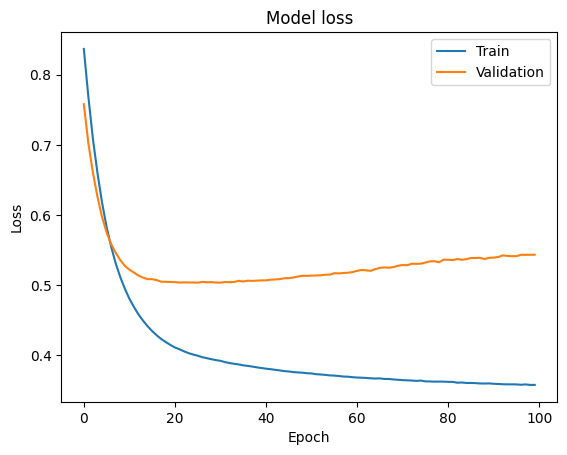

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for regression
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

CHECKING GPU IS AVAILABLE OR NOT

In [ ]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-6.1.58+-x86_64-with-glibc2.35
Tensor Flow Version: 2.15.0

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Pandas 1.5.3
Scikit-Learn 1.2.2
SciPy 1.11.4
GPU is NOT AVAILABLE
